In [105]:
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit import *


#CIRCUITO DE PRUEBA TUTORIAL

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2) # El izquierdo me da el numero de qubits a cero y el derecho en numero de bits clasicos para representarlos al medir

# Add a H gate on qubit 0
circuit.h(0)
circuit.h(1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
#circuit.cx(0, 1) 

# Map the quantum measurement to the classical bits
circuit.measure(range(2),range(2)) #guarda el resultado de medir el qubit de la izquierda en el cbit (Clasical bit) de la derecha, se puede poner en tuplas

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'11': 237, '10': 232, '00': 261, '01': 270}


┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

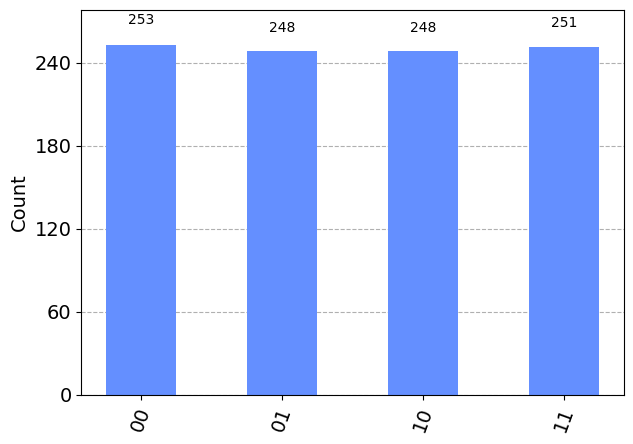

In [70]:
plot_histogram(counts)

In [99]:
#CIRCUITO SENCILLO 1
circ1 = QuantumCircuit(3)
circ1.x(0)
circ1.cnot(1,2)
circ1.h(1)
circ1.cnot(0,1)
circ1.x(0)
circ1.z(1)
circ1.x(2)
#circ1.draw('mpl')


meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the compose method.
circ1.add_register(meas.cregs[0])
qc = circ1.compose(meas)
qc.draw()







┌───┐          ┌───┐ ░ ┌─┐      
q_0: ┤ X ├───────■──┤ X ├─░─┤M├──────
     └───┘┌───┐┌─┴─┐├───┤ ░ └╥┘┌─┐   
q_1: ──■──┤ H ├┤ X ├┤ Z ├─░──╫─┤M├───
     ┌─┴─┐├───┤└───┘└───┘ ░  ║ └╥┘┌─┐
q_2: ┤ X ├┤ X ├───────────░──╫──╫─┤M├
     └───┘└───┘           ░  ║  ║ └╥┘
c: 3/════════════════════════╩══╩══╩═
                             0  1  2

In [103]:
#CIRCUITO 1 SENCILLO RESULTADOS

backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'100': 542, '110': 482}


Statevector([ 0.   +0.j,  0.   +0.j, -0.   +0.j, -0.   +0.j,  0.707+0.j,
              0.   +0.j, -0.707+0.j, -0.   +0.j],
            dims=(2, 2, 2))


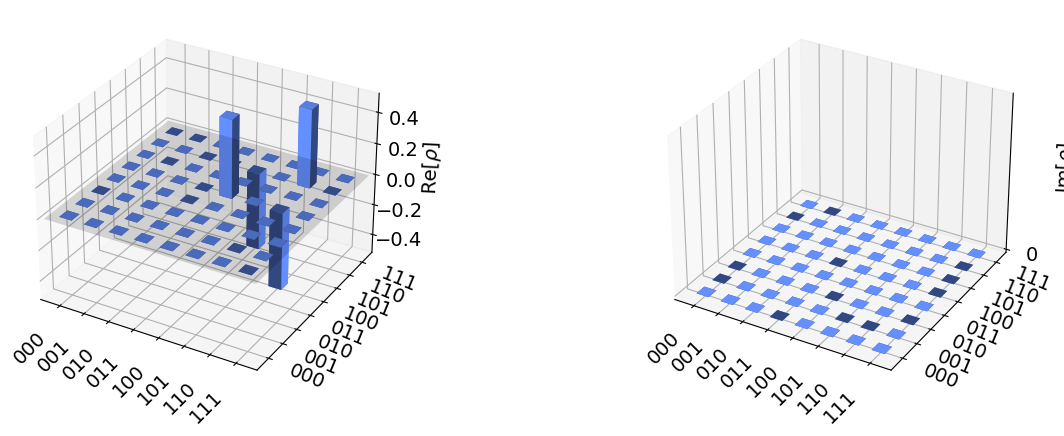

In [86]:
#CIRCUITO 1 SENCILLO STATEVECTOR

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = backend.run(circ1)

result = job.result()
outputstate = result.get_statevector(circ1, decimals=3)
print(outputstate)

plot_state_city(outputstate)

In [93]:
#CIRCUITO SENCILLO 2
circ2 = QuantumCircuit(2)
circ2.x(1)
circ2.h(0)
circ2.h(1)
circ2.cnot(0,1)
circ2.h(0)
circ2.h(1)

#circ2.draw('mpl')


meas2 = QuantumCircuit(2, 2)
meas2.barrier(range(2))
# map the quantum measurement to the classical bits
meas2.measure(range(2), range(2))

# The Qiskit circuit object supports composition using
# the compose method.
circ2.add_register(meas2.cregs[0])
qc2 = circ2.compose(meas2)
qc2.draw()


┌───┐          ┌───┐ ░ ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─░─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├┤ H ├─░──╫─┤M├
     └───┘└───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

In [94]:
#CIRCUITO SENCILLO 2

backend_sim2 = Aer.get_backend('qasm_simulator')

job_sim2 = backend_sim2.run(transpile(qc2, backend_sim2), shots=1024)

result_sim2 = job_sim2.result()
counts2 = result_sim2.get_counts(qc2)
print(counts2)

{'11': 1024}


In [98]:
#CIRCUITO SENCILLO 3
circ3 = QuantumCircuit(2)
circ3.x(1)
circ3.cnot(0,1)
circ3.cnot(1,0)
circ3.cnot(0,1)
circ3.swap(0,1)


#circ3.draw('mpl')


meas3 = QuantumCircuit(2, 2)
meas3.barrier(range(2))
# map the quantum measurement to the classical bits
meas3.measure(range(2), range(2))

# The Qiskit circuit object supports composition using
# the compose method.
circ3.add_register(meas3.cregs[0])
qc3 = circ3.compose(meas3)
backend_sim3 = Aer.get_backend('qasm_simulator')

job_sim3 = backend_sim3.run(transpile(qc3, backend_sim3), shots=1024)

result_sim3 = job_sim3.result()
counts3 = result_sim3.get_counts(qc3)

print(counts3)
qc3.draw()

{'10': 1024}


┌───┐         ░ ┌─┐   
q_0: ───────■──┤ X ├──■───X──░─┤M├───
     ┌───┐┌─┴─┐└─┬─┘┌─┴─┐ │  ░ └╥┘┌─┐
q_1: ┤ X ├┤ X ├──■──┤ X ├─X──░──╫─┤M├
     └───┘└───┘     └───┘    ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

In [115]:
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])
print(larger_qc.draw())

print(larger_qc.decompose().draw())



        ┌────────────────┐
q208_0: ┤0               ├
        │                │
q208_1: ┤1 oracle(theta) ├
        │                │
q208_2: ┤2               ├
        └┬──────────────┬┘
q208_3: ─┤0             ├─
         │              │ 
q208_4: ─┤1 oracle(phi) ├─
         │              │ 
q208_5: ─┤2             ├─
        ┌┴──────────────┴┐
q208_6: ┤0               ├
        │                │
q208_7: ┤1 oracle(gamma) ├
        │                │
q208_8: ┤2               ├
        └────────────────┘
        ┌───────────┐                                    
q208_0: ┤ Rz(theta) ├──■─────────────────────────────────
        └───────────┘┌─┴─┐┌───────────┐                  
q208_1: ─────────────┤ X ├┤ Rz(theta) ├──■───────────────
                     └───┘└───────────┘┌─┴─┐┌───────────┐
q208_2: ───────────────────────────────┤ X ├┤ Rz(theta) ├
         ┌─────────┐                   └───┘└───────────┘
q208_3: ─┤ Rz(phi) ├───■─────────────────────────────────
         └─────────┘ ┌─

In [117]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity
a = Operator(Pauli('X'))
b = Operator(Pauli('Z'))
print(a & b)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))
